# High Frequency Data and Limit Order Books - LAB 1.

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import norm
import matplotlib.dates as md

**Introduction:** This notebook is dedicated to the study and the exploration of some High-Frequency phenomena, related to limit order books analysis for EDF, Renault and Total stocks.

## 2.1. and 2.2.: Date and time, continuous double auction.

Loading and preprocessing data.

In [128]:
from datetime import datetime
edf_trades = []
edf_quotes = []
renault_trades = []
renault_quotes = []
total_trades = []
total_quotes = []
edf_pre = "/Users/jeremymarck/Desktop/M2Finance/S2/HFLOB/TP/TP1/Data/EDF.PA-201509"
renault_pre = "/Users/jeremymarck/Desktop/M2Finance/S2/HFLOB/TP/TP1/Data/RENA.PA-201509"
total_pre = "/Users/jeremymarck/Desktop/M2Finance/S2/HFLOB/TP/TP1/Data/TOTF.PA-201509"
end_quote = "-Quotes.csv.gz"
end_trade = "-Trades.csv.gz"
for i in range(30):
    day = i+1
    if day < 10:
        date = datetime.strptime('2015-09-'+'0'+str(day),'%Y-%m-%d')
        if date.weekday()<5:
            trades_edf = pd.read_csv(edf_pre+'0'+str(day)+end_trade)
            trades_rena = pd.read_csv(renault_pre+'0'+str(day)+end_trade)
            trades_totf = pd.read_csv(total_pre+'0'+str(day)+end_trade)
            quotes_edf = pd.read_csv(edf_pre+'0'+str(day)+end_quote)
            quotes_rena = pd.read_csv(renault_pre+'0'+str(day)+end_quote)
            quotes_totf = pd.read_csv(total_pre+'0'+str(day)+end_quote)
        else:
            continue
    else:
        date = datetime.strptime('2015-09-'+str(day),'%Y-%m-%d')
        if date.weekday() < 5:
            trades_edf = pd.read_csv(edf_pre + str(day) + end_trade)
            trades_rena = pd.read_csv(renault_pre + str(day) + end_trade)
            trades_totf = pd.read_csv(total_pre + str(day) + end_trade)
            quotes_edf = pd.read_csv(edf_pre + str(day) + end_quote)
            quotes_rena = pd.read_csv(renault_pre + str(day) + end_quote)
            quotes_totf = pd.read_csv(total_pre + str(day) + end_quote)
        else:
            continue
    trades_edf['date_delta'] = pd.to_timedelta(trades_edf['date_xl'],unit = 'D') + datetime(1900,1,1)
    trades_edf['ts_delta'] = pd.to_timedelta(trades_edf['ts'],unit='s')
    trades_totf['date_delta'] = pd.to_timedelta(trades_totf['date_xl'],unit='D')+datetime(1900,1,1)
    trades_totf['ts_delta'] = pd.to_timedelta(trades_totf['ts'],unit='s')
    trades_rena['date_delta'] = pd.to_timedelta(trades_rena['date_xl'],unit='D')+datetime(1900,1,1)
    trades_rena['ts_delta'] = pd.to_timedelta(trades_rena['ts'],unit='s')
    quotes_edf['date_delta']= pd.to_timedelta(quotes_edf['date_xl'],unit='D')+datetime(1900,1,1)
    quotes_edf['ts_delta'] = pd.to_timedelta(quotes_edf['ts'],unit='s')
    quotes_totf['date_delta'] = pd.to_timedelta(quotes_totf['date_xl'],unit='D')+datetime(1900,1,1)
    quotes_totf['ts_delta'] = pd.to_timedelta(quotes_totf['ts'],unit='s')
    quotes_rena['date_delta'] = pd.to_timedelta(quotes_rena['date_xl'],unit='D')+datetime(1900,1,1)
    quotes_rena['ts_delta'] = pd.to_timedelta(quotes_rena['ts'],unit='s')
    trades_edf = trades_edf[trades_edf['lastFtxt'] == 'normal']
    trades_totf = trades_totf[trades_totf['lastFtxt'] == 'normal']
    trades_rena = trades_rena[trades_rena['lastFtxt'] == 'normal']
    trades_edf = trades_edf.reset_index()
    del trades_edf['index']
    trades_totf = trades_totf.reset_index()
    del trades_totf['index']
    trades_rena = trades_rena.reset_index()
    del trades_rena['index']
    quotes_edf = quotes_edf[quotes_edf['ts'] >= trades_edf['ts'][0]]
    quotes_edf = quotes_edf[quotes_edf['ts'] <= trades_edf['ts'][len(trades_edf)-1]]
    quotes_totf = quotes_totf[quotes_totf['ts'] >= trades_totf['ts'][0]]
    quotes_totf = quotes_totf[quotes_totf['ts'] <= trades_totf['ts'][len(trades_totf)-1]]
    quotes_rena = quotes_rena[quotes_rena['ts'] >= trades_rena['ts'][0]]
    quotes_rena = quotes_rena[quotes_rena['ts'] <= trades_rena['ts'][len(trades_rena)-1]]
    edf_trades.append(trades_edf)
    edf_quotes.append(quotes_edf)
    total_trades.append(trades_totf)
    total_quotes.append(quotes_totf)
    renault_trades.append(trades_rena)
    renault_quotes.append(quotes_rena)

## 2.3. Overview


**Number of selected trades per day.**

For each stock, we plot the number of selected trades per day, as well as its average on the sample.

**** EDF ****


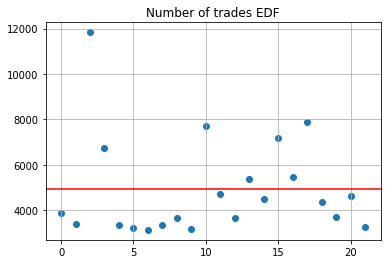

****************
**** Renault ****


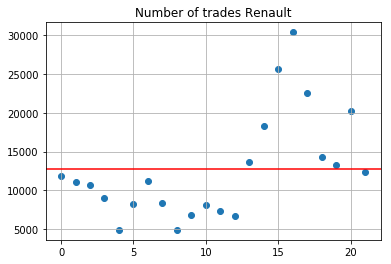

****************
**** Total ****


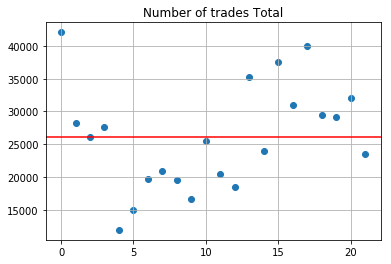

In [10]:
print('**** EDF ****')
numb_trades_edf = np.zeros(len(edf_trades))
for i in range(len(edf_trades)):
    numb_trades_edf[i] = len(edf_trades[i])
plt.scatter(range(len(edf_trades)), numb_trades_edf)
plt.title('Number of trades EDF')
plt.axhline(y = np.mean(numb_trades_edf), color='r')
plt.grid(True)
plt.show()
print('****************')

print('**** Renault ****')
numb_trades = np.zeros(len(renault_trades))
for i in range(len(renault_trades)):
    numb_trades[i] = len(renault_trades[i])
plt.scatter(range(len(renault_trades)), numb_trades)
plt.title('Number of trades Renault')
plt.axhline(y = np.mean(numb_trades),color='r')
plt.grid(True)
plt.show()
print('****************')

print('**** Total ****')
numb_trades = np.zeros(len(total_trades))
for i in range(len(total_trades)):
    numb_trades[i] = len(total_trades[i])
plt.scatter(range(len(total_trades)), numb_trades)
plt.title('Number of trades Total')
plt.axhline(y = np.mean(numb_trades), color = 'r')
plt.grid(True)
plt.show()

**Number of quotes per day.**

For each stock, we plot the number of selected lines of the quote file per day, as well as its average on the sample.

**** EDF ****


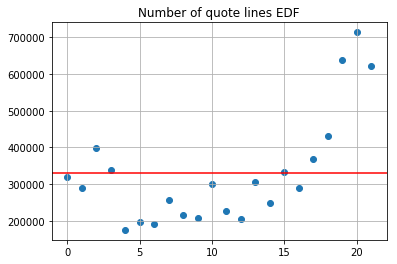

****************
**** Renault ****


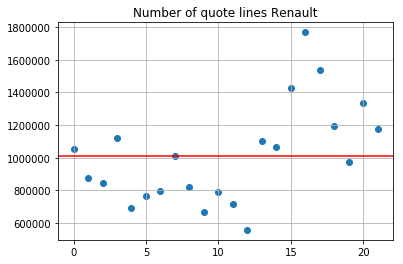

**************
**** Total ****


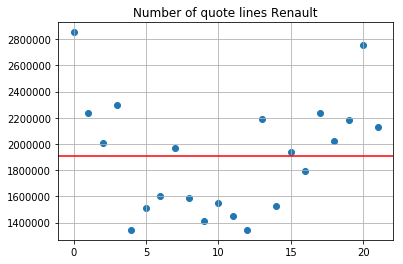

In [11]:
print('**** EDF ****')
numb_quotes = np.zeros(len(edf_quotes))
for i in range(len(edf_quotes)):
    numb_quotes[i] = len(edf_quotes[i])
plt.scatter(range(len(edf_quotes)),numb_quotes)
plt.title('Number of quote lines EDF')
plt.axhline(y=np.mean(numb_quotes),color='r')
plt.grid(True)
plt.show()
print('****************')

print('**** Renault ****')
numb_quotes = np.zeros(len(renault_quotes))
for i in range(len(renault_quotes)):
    numb_quotes[i] = len(renault_quotes[i])
plt.scatter(range(len(renault_quotes)), numb_quotes)
plt.title('Number of quote lines Renault')
plt.axhline(y = np.mean(numb_quotes),color = 'r')
plt.grid(True)
plt.show()
print('**************')

print('**** Total ****')
numb_quotes = np.zeros(len(total_quotes))
for i in range(len(total_quotes)):
    numb_quotes[i] = len(total_quotes[i])
plt.scatter(range(len(total_quotes)),numb_quotes)
plt.title('Number of quote lines Renault')
plt.axhline(y = np.mean(numb_quotes),color = 'r')
plt.grid(True)
plt.show()

**Evolution  of the trade price on the sample.**

**EDF**

In [12]:
edf_price_evol = pd.concat(edf_trades)
edf_price_evol = edf_price_evol.reset_index()

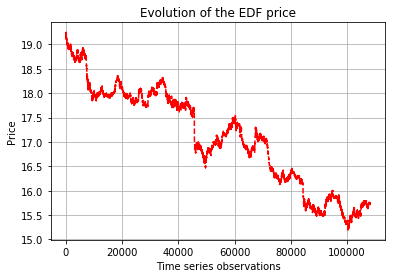

In [14]:
plt.plot(edf_price_evol['last'],'r--', color = 'r')
plt.title('Evolution of the EDF price')
plt.xlabel('Time series observations')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Renault**

In [15]:
renault_price_evol = pd.concat(renault_trades)
renault_price_evol = renault_price_evol.reset_index()

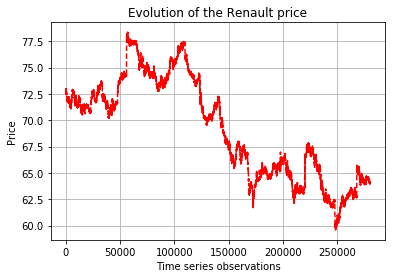

In [16]:
plt.plot(renault_price_evol['last'],'r--', color = 'r')
plt.title('Evolution of the Renault price')
plt.xlabel('Time series observations')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Total**

In [17]:
total_price_evol = pd.concat(total_trades)
total_price_evol = total_price_evol.reset_index()

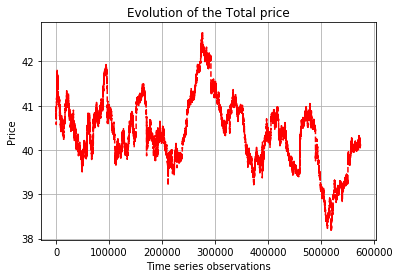

In [19]:
plt.plot(total_price_evol['last'],'r--', color = 'r')
plt.title('Evolution of the Total price')
plt.xlabel('Time series observations')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 3. Descriptive statistics using the trade files

# EDF


## 3.1. Trades durations

In [22]:
for i in range(len(edf_trades)):
    trades = edf_trades[i]
    trades['dif'] = trades['ts'].diff()
    edf_trades[i] = trades

In [33]:
trades = pd.concat(edf_trades)
print('Max difference:', trades['dif'].max())
print('Min difference:', trades['dif'].min())
print('Mean difference:', trades['dif'].mean())

Max difference: 556.4969999999958
Min difference: 0.0
Mean difference: 6.222301475755643


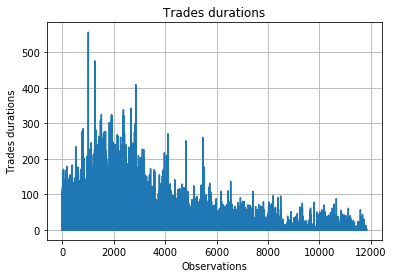

In [34]:
plt.plot(trades['dif'])
plt.title('Trades durations')
plt.xlabel('Observations')
plt.ylabel('Trades durations')
plt.grid(True)
plt.show()

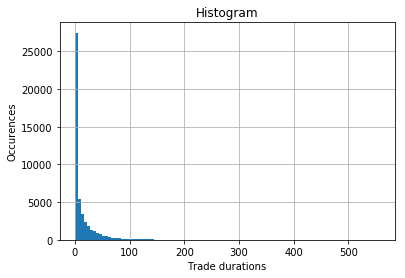

In [35]:
# An histogram keeping interesting values only.
trades1 = trades[trades['dif'] >= 0.001]

plt.hist(trades1['dif'],100)
plt.title('Histogram')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

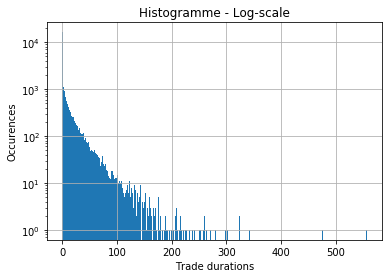

In [39]:
# Log Scale
trades1 = trades[trades['dif'] >= 0.001]

plt.hist(trades1['dif'],1000)
plt.title('Histogramme - Log-scale')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.yscale('log')
plt.grid(True)
plt.show()

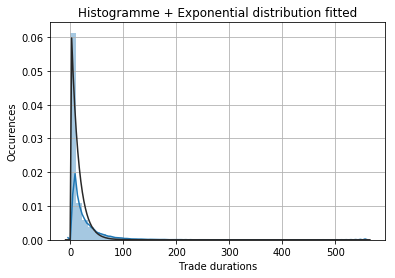

In [40]:
# Fitting an exponential distribution
graph_duration = sns.distplot(trades1['dif'], fit = expon)
plt.title('Histogramme + Exponential distribution fitted')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

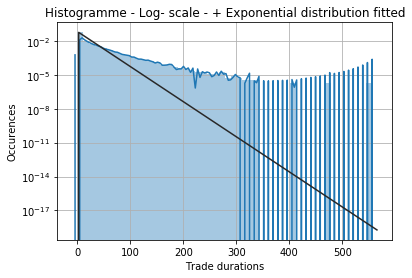

In [41]:
graph_duration = sns.distplot(trades1['dif'], fit = expon)
graph_duration.set_yscale('log')
plt.title('Histogramme - Log- scale - + Exponential distribution fitted')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

## 3.2. Trade sizes

In [76]:
# Some statistics about trade sizes
print('Max size:', trades['lastQ'].max())
print('Min size:', trades['lastQ'].min())
print('Mean size:', trades['lastQ'].mean())

Max size: 19530.0
Min size: 1.0
Mean size: 212.51439302392802


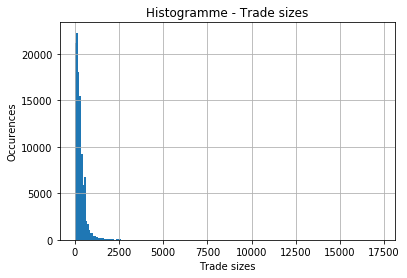

In [43]:
# Plotting an histogram of the trade sizes
plt.hist(trades['lastQ'],200)
plt.title('Histogramme - Trade sizes')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

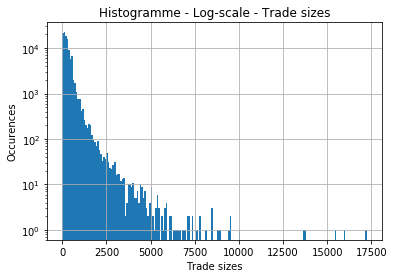

In [44]:
plt.hist(trades['lastQ'],200)
plt.yscale('log')
plt.title('Histogramme - Log-scale - Trade sizes')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

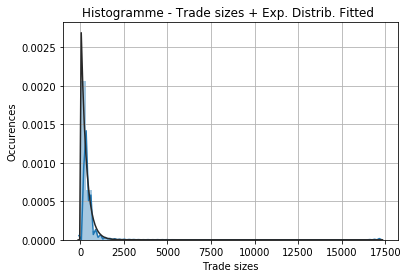

In [45]:
# Trades sizes
graph_trades = sns.distplot(trades['lastQ'], fit = expon)
plt.title('Histogramme - Trade sizes + Exp. Distrib. Fitted ')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

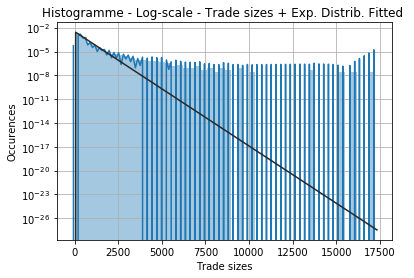

In [46]:
# Plotting the empirical distribution and fitting an exponential distribution
graph_trades = sns.distplot(trades['lastQ'], fit = expon)
graph_trades.set_yscale('log')
plt.title('Histogramme - Log-scale - Trade sizes + Exp. Distrib. Fitted ')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

# Renault
## 3.1. Trades durations

In [47]:
for i in range(len(renault_trades)):
    trades = renault_trades[i]
    trades['dif'] = trades['ts'].diff()
    edf_trades[i] = trades

In [48]:
trades = pd.concat(edf_trades)
print('Max difference:', trades['dif'].max())
print('Min difference:', trades['dif'].min())
print('Mean difference:', trades['dif'].mean())

Max difference: 283.4779999999955
Min difference: 0.0
Mean difference: 2.4011447683403144


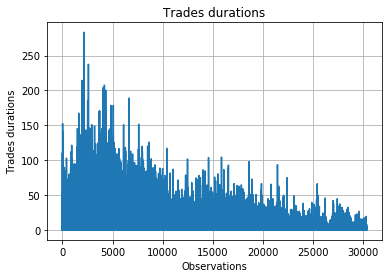

In [49]:
plt.plot(trades['dif'])
plt.title('Trades durations')
plt.xlabel('Observations')
plt.ylabel('Trades durations')
plt.grid(True)
plt.show()

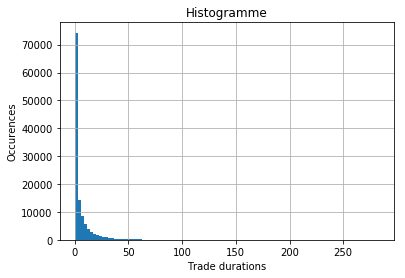

In [51]:
# An histogram keeping interesting values only.
trades1 = trades[trades['dif'] >= 0.001]

plt.hist(trades1['dif'],100)
plt.title('Histogramme')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

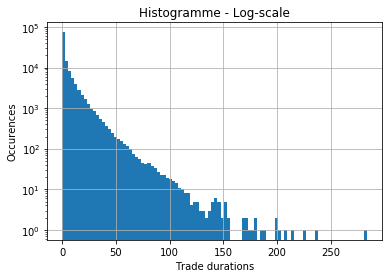

In [52]:
# Log Scale
trades1 = trades[trades['dif'] >= 0.001]

plt.hist(trades1['dif'],100)
plt.yscale('log')
plt.title('Histogramme - Log-scale')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.yscale('log')
plt.grid(True)
plt.show()

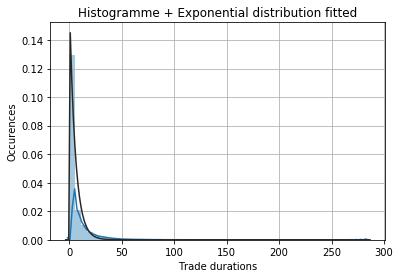

In [53]:
# Fitting an exponential distribution
graph_duration = sns.distplot(trades1['dif'], fit = expon)
plt.title('Histogramme + Exponential distribution fitted')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

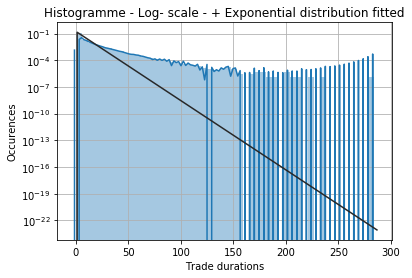

In [54]:
graph_duration = sns.distplot(trades1['dif'], fit = expon)
graph_duration.set_yscale('log')
plt.title('Histogramme - Log- scale - + Exponential distribution fitted')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

## 3.2. Trade sizes

In [75]:
# Some statistics about trade sizes

print('Max size:', trades['lastQ'].max())
print('Min size:', trades['lastQ'].min())
print('Mean size:', trades['lastQ'].mean())

Max size: 19530.0
Min size: 1.0
Mean size: 212.51439302392802


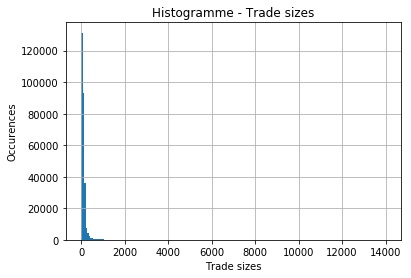

In [56]:
# Plotting an histogram of the trade sizes
plt.hist(trades['lastQ'],200)
plt.title('Histogramme - Trade sizes')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

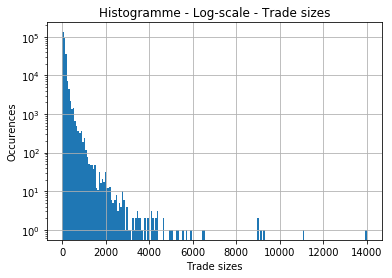

In [57]:
plt.hist(trades['lastQ'],200)
plt.yscale('log')
plt.title('Histogramme - Log-scale - Trade sizes')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

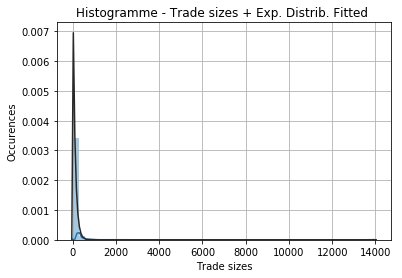

In [58]:
# Trades sizes
graph_trades = sns.distplot(trades['lastQ'], fit = expon)
plt.title('Histogramme - Trade sizes + Exp. Distrib. Fitted ')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

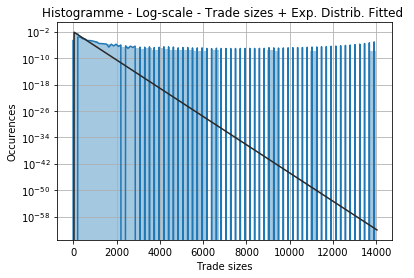

In [59]:
# Plotting the empirical distribution and fitting an exponential distribution
graph_trades = sns.distplot(trades['lastQ'], fit = expon)
graph_trades.set_yscale('log')
plt.title('Histogramme - Log-scale - Trade sizes + Exp. Distrib. Fitted ')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

# Total
## 3.1. Trades durations

In [60]:
for i in range(len(total_trades)):
    trades = total_trades[i]
    trades['dif'] = trades['ts'].diff()
    total_trades[i] = trades

In [61]:
trades = pd.concat(total_trades)
print('Max difference:', trades['dif'].max())
print('Min difference:', trades['dif'].min())
print('Mean difference:', trades['dif'].mean())

Max difference: 116.596000000005
Min difference: 0.0
Mean difference: 1.1720445667999386


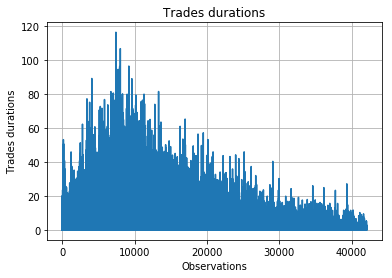

In [62]:
plt.plot(trades['dif'])
plt.title('Trades durations')
plt.xlabel('Observations')
plt.ylabel('Trades durations')
plt.grid(True)
plt.show()

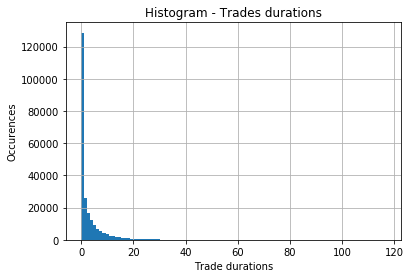

In [65]:
# An histogram keeping interesting values only.
trades1 = trades[trades['dif'] >=0.001]

plt.hist(trades1['dif'],100)
plt.title('Histogram - Trades durations')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

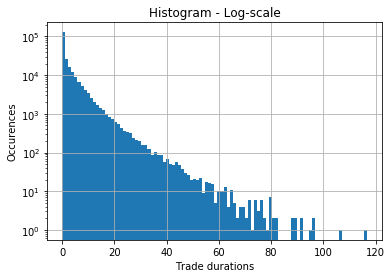

In [67]:
# Log Scale
trades1 = trades[trades['dif'] > 0.001]

plt.hist(trades1['dif'],100)
plt.yscale('log')
plt.title('Histogram - Log-scale')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.yscale('log')
plt.grid(True)
plt.show()


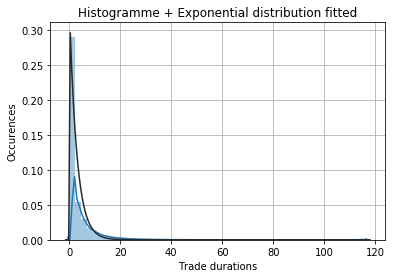

In [68]:
# Fitting an exponential distribution
graph_duration = sns.distplot(trades1['dif'], fit = expon)
plt.title('Histogramme + Exponential distribution fitted')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

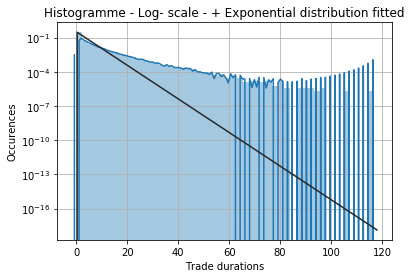

In [69]:
graph_duration = sns.distplot(trades1['dif'], fit = expon)
graph_duration.set_yscale('log')
plt.title('Histogramme - Log- scale - + Exponential distribution fitted')
plt.xlabel('Trade durations')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

## 3.2. Trade sizes

In [74]:
# Some statistics about trade sizes

print('Max size:', trades['lastQ'].max())
print('Min size:', trades['lastQ'].min())
print('Mean size:', trades['lastQ'].mean())

Max size: 19530.0
Min size: 1.0
Mean size: 212.51439302392802


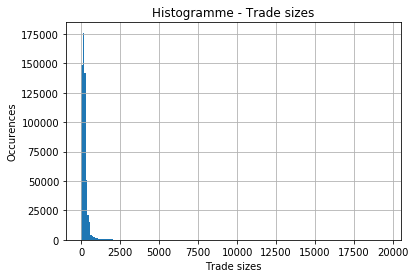

In [70]:
# Plotting an histogram of the trade sizes
plt.hist(trades['lastQ'],200)
plt.title('Histogramme - Trade sizes')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()


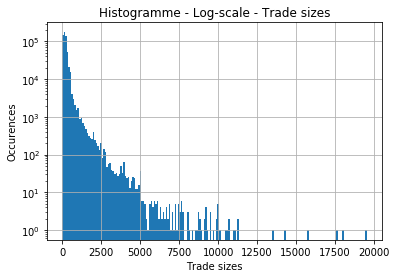

In [71]:
plt.hist(trades['lastQ'],200)
plt.yscale('log')
plt.yscale('log')
plt.title('Histogramme - Log-scale - Trade sizes')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

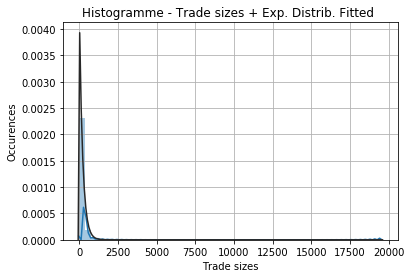

In [73]:
# Trades sizes
graph_trades = sns.distplot(trades['lastQ'], fit = expon)
plt.title('Histogramme - Trade sizes + Exp. Distrib. Fitted ')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

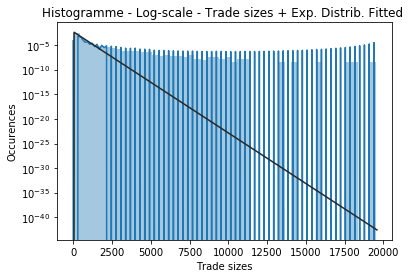

In [50]:
# Plotting the empirical distribution and fitting an exponential distribution
graph_trades = sns.distplot(trades['lastQ'], fit = expon)
graph_trades.set_yscale('log')
plt.title('Histogramme - Log-scale - Trade sizes + Exp. Distrib. Fitted ')
plt.xlabel('Trade sizes')
plt.ylabel('Occurences')
plt.show()

Durations are, in average, short. 

Trade sizes are more important, in average.

For more informations, look at the statistics edited for each stock.

# 3.3 Intraday activity.

**EDF intraday activity.**

In [99]:
df = edf_trades[0]
df['ts_delta'] = df['ts_delta'] + df['date_delta']

In [100]:
t = df.set_index('ts_delta').groupby(pd.Grouper(freq = '2Min')).count()

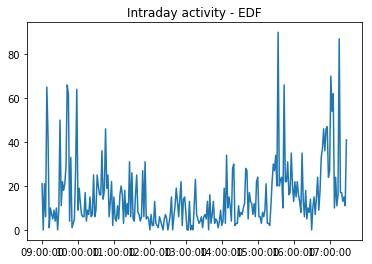

In [101]:
plt.plot(t['date_delta'])
xfmt = md.DateFormatter('%H:%M:%S')
ax = plt.gca()
plt.title('Intraday activity - EDF')
ax.xaxis.set_major_formatter(xfmt)

**Renault intraday activity.**

In [102]:
df = renault_trades[0]
df['ts_delta'] = df['ts_delta'] + df['date_delta']

In [103]:
t = df.set_index('ts_delta').groupby(pd.Grouper(freq = '2Min')).count()

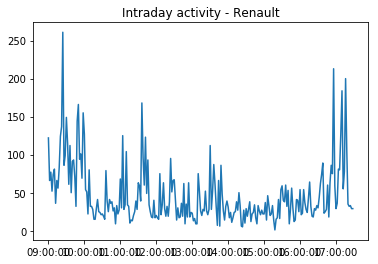

In [104]:
plt.plot(t['date_delta'])
xfmat = md.DateFormatter('%H:%M:%S')
ax = plt.gca()
plt.title('Intraday activity - Renault')
ax.xaxis.set_major_formatter(xfmt)

**Total intraday activity.**

In [105]:
df = total_trades[0]
df['ts_delta'] = df['ts_delta'] + df['date_delta']

In [106]:
t = df.set_index('ts_delta').groupby(pd.Grouper(freq = '2Min')).count()

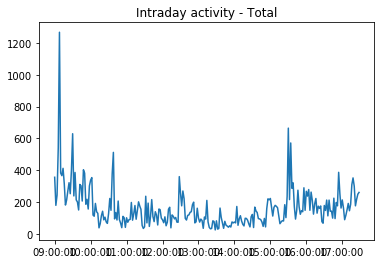

In [108]:
plt.plot(t['date_delta'])
xfmat = md.DateFormatter('%H:%M:%S')
ax = plt.gca()
plt.title('Intraday activity - Total')
ax.xaxis.set_major_formatter(xfmt)

Intraday activities are quite different between the the 3 stocks. The most traded one seems to be Total, the second one is Renault and the last one is EDF.

# 4. Descriptive statistics using the quote files

## 4.1. Spread distribution

**EDF.**

In [115]:
l_spread = []
for i in range(len(edf_quotes)):
    quotes = edf_quotes[i]
    quotes_best = quotes[quotes['level'] == 1]
    quotes_best = quotes_best.reset_index()
    del quotes_best['index']
    ask = 0
    bid = 0 
    spread = np.zeros(len(quotes_best))
    for j in range(len(quotes_best)):
        if quotes_best['type'][j] == 'A':
            ask = quotes_best['price'][j]
        else:
            bid = quotes_best['price'][j]
        if (ask!=0) & (bid!=0):
            spread[j] = ask - bid
    spread = spread[spread!=0]
    l_spread.append(spread)

l = []
for elem in l_spread:
    for think in elem:
        l.append(think)

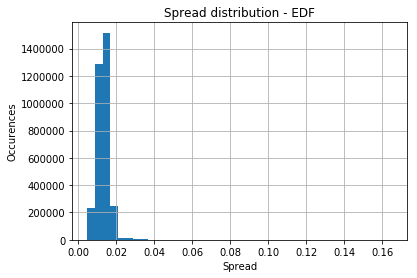

Comment: mean of the spread distribution is: 0.012913529936582149


In [116]:
plt.hist(l,40)
plt.title('Spread distribution - EDF')
plt.xlabel('Spread')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()
print('Comment: mean of the spread distribution is:', np.mean(l))

## In calendar time

In [117]:
quotes_best.head()

date_xl         ts type  level   price     qty date_delta        ts_delta
0  42277.0  32428.358    B      1  15.665   837.0 2015-10-02 09:00:28.358000
1  42277.0  32428.378    B      1  15.665  1287.0 2015-10-02 09:00:28.378000
2  42277.0  32428.447    B      1  15.670   568.0 2015-10-02 09:00:28.447000
3  42277.0  32428.508    B      1  15.665  1287.0 2015-10-02 09:00:28.508000
4  42277.0  32429.545    B      1  15.665  1172.0 2015-10-02 09:00:29.545000

In [118]:
l_spread = []
for i in range(len(edf_quotes)):
    quotes = edf_quotes[i]
    quotes_best = quotes[quotes['level'] == 1]
    quotes_best = quotes_best.reset_index()
    del quotes_best['index']
    ask = 0
    bid = 0 
    spread = np.zeros(len(quotes_best))
    for j in range(len(quotes_best)):
        if quotes_best['type'][j] == 'A':
            ask = quotes_best['price'][j]
            ask_time = quotes_best['ts_delta'][j]
        else:
            bid = quotes_best['price'][j]
            bid_time = quotes_best['ts_delta'][j]
        if (ask!=0) & (bid!=0):
            spread[j] = np.absolute((ask - bid)*(ask_time-bid_time).total_seconds())
    spread = spread[spread!=0]
    l_spread.append(spread)

l = []
for elem in l_spread:
    for think in elem:
        l.append(think)

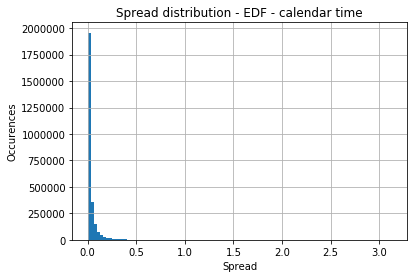

Comment: mean of the spread distribution is: 0.032168863774575465


In [119]:
plt.hist(l,100)
plt.title('Spread distribution - EDF - calendar time')
plt.xlabel('Spread')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()
print('Comment: mean of the spread distribution is:', np.mean(l))

# Renault

In [120]:
l_spread = []
for i in range(len(renault_quotes)):
    quotes = renault_quotes[i]
    quotes_best = quotes[quotes['level'] == 1]
    quotes_best = quotes_best.reset_index()
    del quotes_best['index']
    ask = 0
    bid = 0 
    spread = np.zeros(len(quotes_best))
    for j in range(len(quotes_best)):
        if quotes_best['type'][j] == 'A':
            ask = quotes_best['price'][j]
        else:
            bid = quotes_best['price'][j]
        if (ask!=0) & (bid!=0):
            spread[j] = ask - bid
    spread = spread[spread!=0]
    l_spread.append(spread)

l = []
for elem in l_spread:
    for think in elem:
        l.append(think)

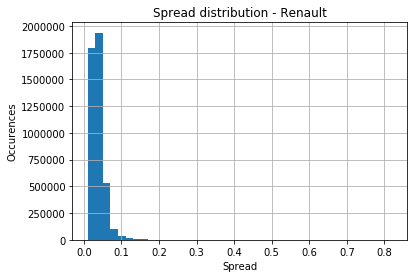

Comment: mean of the spread distribution is: 0.04096194986501571


In [121]:
plt.hist(l,40)
plt.title('Spread distribution - Renault')
plt.xlabel('Spread')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()
print('Comment: mean of the spread distribution is:', np.mean(l))

In [122]:
l_spread = []
for i in range(len(renault_quotes)):
    quotes = renault_quotes[i]
    quotes_best = quotes[quotes['level'] == 1]
    quotes_best = quotes_best.reset_index()
    del quotes_best['index']
    ask = 0
    bid = 0 
    spread = np.zeros(len(quotes_best))
    for j in range(len(quotes_best)):
        if quotes_best['type'][j] == 'A':
            ask = quotes_best['price'][j]
            ask_time=quotes_best['ts_delta'][j]
        else:
            bid = quotes_best['price'][j]
            bid_time=quotes_best['ts_delta'][j]
        if (ask!=0) & (bid!=0):
            spread[j] = np.absolute((ask - bid)*(ask_time-bid_time).total_seconds())
    spread = spread[spread!=0]
    l_spread.append(spread)

l = []
for elem in l_spread:
    for think in elem:
        l.append(think)

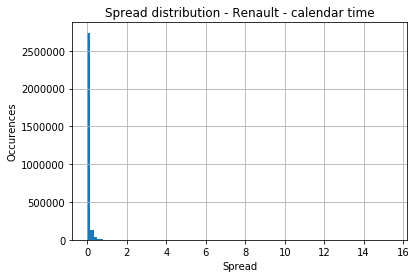

Comment: mean of the spread distribution is: 0.041399577414395705


In [125]:
plt.hist(l,100)
plt.title('Spread distribution - Renault - calendar time')
plt.xlabel('Spread')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()
print('Comment: mean of the spread distribution is:', np.mean(l))

# Total

In [129]:
l_spread = []
for i in range(len(total_quotes)):
    quotes = total_quotes[i]
    quotes_best = quotes[quotes['level'] == 1]
    quotes_best = quotes_best.reset_index()
    del quotes_best['index']
    ask = 0
    bid = 0 
    spread = np.zeros(len(quotes_best))
    for j in range(len(quotes_best)):
        if quotes_best['type'][j] == 'A':
            ask = quotes_best['price'][j]
        else:
            bid = quotes_best['price'][j]
        if (ask!=0) & (bid!=0):
            spread[j] = ask - bid
    spread = spread[spread!=0]
    l_spread.append(spread)

l = []
for elem in l_spread:
    for think in elem:
        l.append(think)

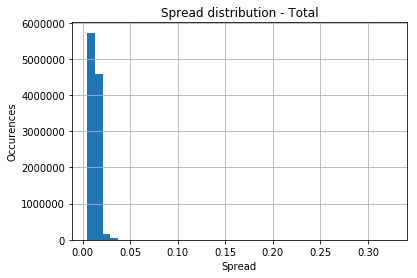

Comment: mean of the spread distribution is: 0.01239783190116231


In [130]:
plt.hist(l,40)
plt.title('Spread distribution - Total')
plt.xlabel('Spread')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()
print('Comment: mean of the spread distribution is:', np.mean(l))

In [131]:
l_spread = []
for i in range(len(total_quotes)):
    quotes = total_quotes[i]
    quotes_best = quotes[quotes['level'] == 1]
    quotes_best = quotes_best.reset_index()
    del quotes_best['index']
    ask = 0
    bid = 0 
    spread = np.zeros(len(quotes_best))
    for j in range(len(quotes_best)):
        if quotes_best['type'][j] == 'A':
            ask = quotes_best['price'][j]
            ask_time=quotes_best['ts_delta'][j]
        else:
            bid = quotes_best['price'][j]
            bid_time=quotes_best['ts_delta'][j]
        if (ask!=0) & (bid!=0):
            spread[j] = np.absolute((ask - bid)*(ask_time-bid_time).total_seconds())
    spread = spread[spread!=0]
    l_spread.append(spread)

l = []
for elem in l_spread:
    for think in elem:
        l.append(think)

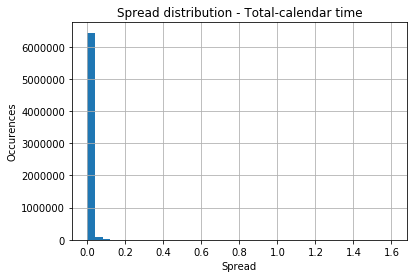

Comment: mean of the spread distribution is: 0.005344470699712605


In [132]:
plt.hist(l,40)
plt.title('Spread distribution - Total-calendar time')
plt.xlabel('Spread')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()
print('Comment: mean of the spread distribution is:', np.mean(l))

# 4.2. Average Shape of the LOB

## EDF

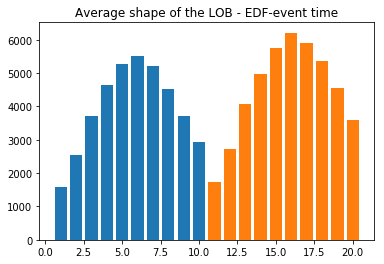

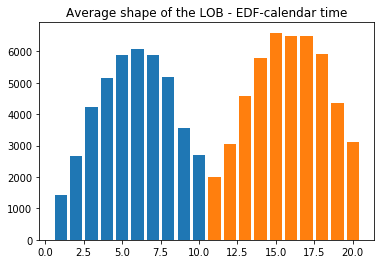

In [133]:
quotes = edf_quotes[0].reset_index()
del quotes['index']

bid_price = np.zeros(10)
bid_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'B']
    bid_price[i-1] = np.mean(level['price'])
    bid_volume[i-1] = np.mean(level['qty'])

ask_price = np.zeros(10)
ask_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'A']
    ask_price[i-1] = np.mean(level['price'])
    ask_volume[i-1] = np.mean(level['qty'])

plt.bar(range(1,11),bid_volume)

plt.bar(range(11,21),ask_volume)

plt.title('Average shape of the LOB - EDF-event time')

plt.show()

bid_price = np.zeros(10)
bid_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'B']
    level = level.reset_index()
    total_time=(level['ts_delta'][len(level['ts_delta'])-1]-level['ts_delta'][0])/np.timedelta64(1, 's')
    bid_price[i-1] = sum(level['price'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
    bid_volume[i-1] = sum(level['qty'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
ask_price = np.zeros(10)
ask_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'A']
    level = level.reset_index()
    total_time = (level['ts_delta'][len(level['ts_delta'])-1]-level['ts_delta'][0]).total_seconds()
    ask_price[i-1] = sum(level['price'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
    ask_volume[i-1] = sum(level['qty'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time

plt.bar(range(1,11),bid_volume)

plt.bar(range(11,21),ask_volume)

plt.title('Average shape of the LOB - EDF-calendar time')
plt.show()

Shapes are quite similar.

## Renault

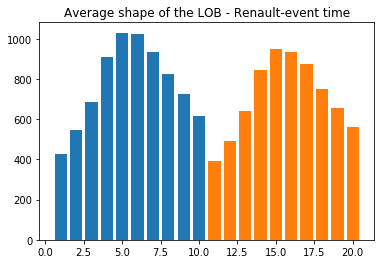

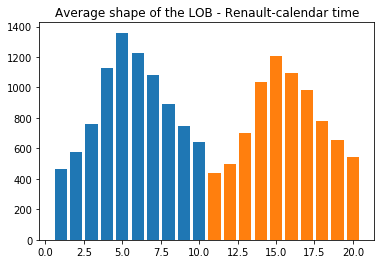

In [134]:
quotes = renault_quotes[0].reset_index()
del quotes['index']

bid_price = np.zeros(10)
bid_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level']==i]
    level = level[level['type']=='B']
    bid_price[i-1] = np.mean(level['price'])
    bid_volume[i-1] = np.mean(level['qty'])

ask_price = np.zeros(10)
ask_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level']==i]
    level = level[level['type']=='A']
    ask_price[i-1] = np.mean(level['price'])
    ask_volume[i-1] = np.mean(level['qty'])

plt.bar(range(1,11),bid_volume)

plt.bar(range(11,21),ask_volume)

plt.title('Average shape of the LOB - Renault-event time')

plt.show()

bid_price = np.zeros(10)
bid_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'B']
    level = level.reset_index()
    total_time = (level['ts_delta'][len(level['ts_delta'])-1]-level['ts_delta'][0])/np.timedelta64(1, 's')
    bid_price[i-1] = sum(level['price'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
    bid_volume[i-1] = sum(level['qty'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
ask_price = np.zeros(10)
ask_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'A']
    level = level.reset_index()
    total_time = (level['ts_delta'][len(level['ts_delta'])-1]-level['ts_delta'][0]).total_seconds()
    ask_price[i-1] = sum(level['price'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
    ask_volume[i-1] = sum(level['qty'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time

plt.bar(range(1,11),bid_volume)

plt.bar(range(11,21),ask_volume)

plt.title('Average shape of the LOB - Renault-calendar time')
plt.show()

Shapes are quite similar.

## Total

In [135]:
quotes = total_quotes[0].reset_index()
del quotes['index']

In [136]:
bid_price = np.zeros(10)
bid_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level']==i]
    level = level[level['type']=='B']
    bid_price[i-1] = np.mean(level['price'])
    bid_volume[i-1] = np.mean(level['qty'])

In [137]:
ask_price = np.zeros(10)
ask_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level']==i]
    level = level[level['type']=='A']
    ask_price[i-1] = np.mean(level['price'])
    ask_volume[i-1] = np.mean(level['qty'])

Text(0.5, 1.0, 'Average shape of the LOB - Total-event time')

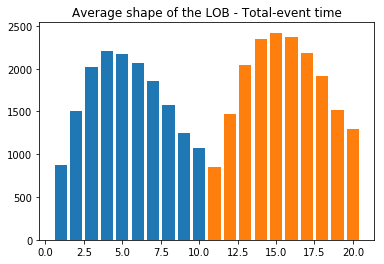

In [138]:
plt.bar(range(1,11),bid_volume)

plt.bar(range(11,21),ask_volume)

plt.title('Average shape of the LOB - Total-event time')

In [139]:
bid_price = np.zeros(10)
bid_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'B']
    level = level.reset_index()
    total_time = (level['ts_delta'][len(level['ts_delta'])-1]-level['ts_delta'][0])/np.timedelta64(1, 's')
    bid_price[i-1] = sum(level['price'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
    bid_volume[i-1] = sum(level['qty'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
ask_price = np.zeros(10)
ask_volume = np.zeros(10)
for i in range(1,11):
    level = quotes[quotes['level'] == i]
    level = level[level['type'] == 'A']
    level = level.reset_index()
    total_time = (level['ts_delta'][len(level['ts_delta'])-1]-level['ts_delta'][0]).total_seconds()
    ask_price[i-1] = sum(level['price'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time
    ask_volume[i-1] = sum(level['qty'][:-1]*(np.diff(level['ts_delta'])/np.timedelta64(1, 's')))/total_time

Text(0.5, 1.0, 'Average shape of the LOB - Total-calendar time')

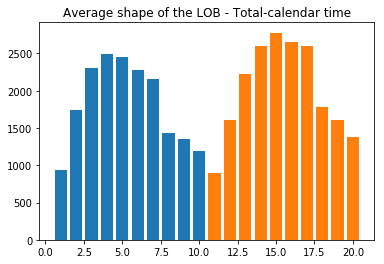

In [140]:
plt.bar(range(1,11),bid_volume)

plt.bar(range(11,21),ask_volume)

plt.title('Average shape of the LOB - Total-calendar time')

Shapes are quite similar.

## 5 Autocorrelation of trade signs

Signing the trades with a tick test.

In [141]:
test = renault_trades[0]
trades_sign = np.zeros(len(test))
ask = 0
bid = test['last'][0]
trades_sign[0] = 1
for i in range(1,len(test)):
    if trades_sign[i-1] == 1:
        if test['last'][i] > bid:
            ask = test['last'][i]
            trades_sign[i] = 1
        else:
            bid = test['last'][i]
            trades_sign[i] =- 1
    else:
        if test['last'][i] < ask:
            bid = test['last'][i]
            trades_sign[i] =- 1
        else:
            ask = test['last'][i]
            trades_sign[i] = 1

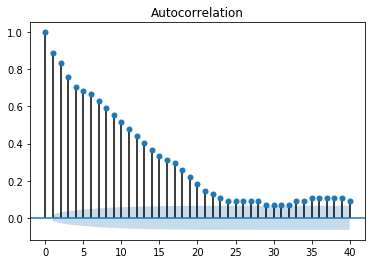

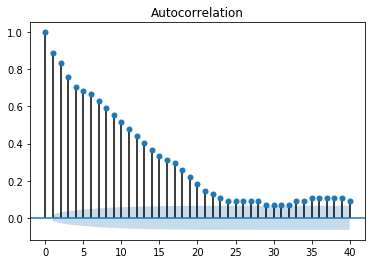

In [143]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(trades_sign, lags = 40)

Autocorrelation is important for lags = 40.